In [1]:
import matplotlib.pyplot as plt
import numpy as np
import discopy.util as util
import discopy.plot as plot
from pathlib import Path

In [37]:
checkpoint_root = Path('/Users/chelseasu/Documents/Disco/')
opts = util.loadOpts(checkpoint_root/ 'checkpoint_0005.h5')
pars = util.loadPars(checkpoint_root/ 'checkpoint_0005.h5')

In [38]:
t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint_root/ 'checkpoint_0005.h5')

In [39]:
t, np.shape(r), np.shape(phi), np.shape(z)

(1.054042495805124, (4992,), (4992,), (4992,))

In [17]:
r[0:40], phi[0:40], z[0:40]

(array([0.22138002, 0.22138002, 0.22138002, 0.22138002, 0.22138002,
        0.22138002, 0.22138002, 0.22138002, 0.22138002, 0.22138002,
        0.22138002, 0.22138002, 0.22138002, 0.22138002, 0.22138002,
        0.22138002, 0.22138002, 0.22138002, 0.22138002, 0.22138002,
        0.22138002, 0.22138002, 0.22138002, 0.22138002, 0.22138002,
        0.22138002, 0.22138002, 0.22138002, 0.22138002, 0.27429762,
        0.27429762, 0.27429762, 0.27429762, 0.27429762, 0.27429762,
        0.27429762, 0.27429762, 0.27429762, 0.27429762, 0.27429762]),
 array([ 2.34539071,  2.56205227,  2.77871383,  2.99537539,  3.21203695,
         3.42869852,  3.64536008,  3.86202164,  4.0786832 ,  4.29534477,
         4.51200633,  4.72866789,  4.94532945,  5.16199102,  5.37865258,
         5.59531414,  5.8119757 ,  6.02863726, -0.03788648,  0.17877508,
         0.39543664,  0.61209821,  0.82875977,  1.04542133,  1.26208289,
         1.47874446,  1.69540602,  1.91206758,  2.12872914,  2.29881123,
         2.47833

In [49]:
# prim includes 5 hydro variables and 1 passive scalar
rho = prim[:,0]
p = prim[:,1]
vr = prim[:,2]
om = prim[:,3]
vz = prim[:,4]
scalar = prim[:,5]


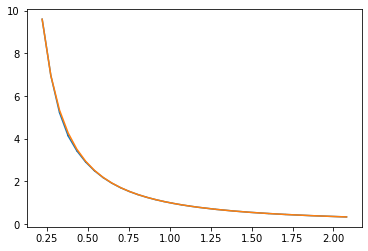

In [25]:
plt.plot(r, om)
plt.plot(r, np.sqrt(1/r**3))

In [31]:
def make_plots_checkpoint(checkpoint, fig_name):
    t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint)
    rho = prim[:,0]
    p = prim[:,1]
    vr = prim[:,2]
    om = prim[:,3]
    vz = prim[:,4]
    fig, ax = plt.subplots(1, 1)
    ax.plot(r, rho)
    ax.set_ylim(0, 1.2)
    fig.savefig(fig_name)
    plt.close(fig) #delete figure from memory
    return

In [32]:
for i in range(30):
    label = '{0:04d}'.format(i)
    checkpoint_name = 'checkpoint_' + label + '.h5'
    fig_name = 'rho_' + label + '.png'
    make_plots_checkpoint(checkpoint_root/ checkpoint_name, fig_name)


In [41]:
gamma = pars['Adiabatic_Index']
c_s = np.sqrt(gamma*p/rho) 

In [45]:
rjph = dat[0] # interface radii between cells
piph = dat[3]


In [46]:
r.shape

(4992,)

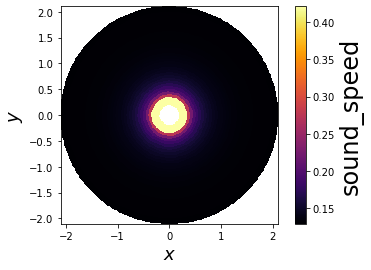

In [48]:
fig, ax = plt.subplots(1, 1)
plot.plotZSlice(fig, ax, rjph, piph, r, c_s, z, 'sound_speed', pars, opts)
fig.savefig('sound_speed.png')


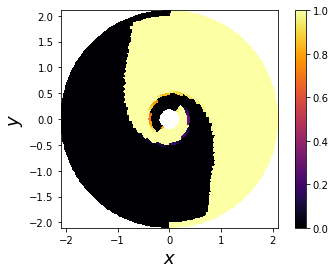

In [51]:
fig, ax = plt.subplots(1, 1)
plot.plotZSlice(fig, ax, rjph, piph, r, scalar, z, '', pars, opts)
# fig.savefig('sound_speed.png')

In [ ]:
# Plot accretion rate as a function of r for all checkpoints
# Plot solutions from disco primer